### 아파트 가격 예측 모델 제작 (선형, 다중)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
# 데이터 불러오기
apart_df = pd.read_csv('../data/new_apart_data_preprocessing_outlier.csv')
apart_df.head()

,Unnamed: 0,receipt_year,gu_name,dong_name,main_lot_num,sub_lot_num,arch_area,floor,arch_year,building_usage,...,pyeong_group,price_euk,price_per_pyeong,contract_year,contract_month,subway_line,subway_name,school_type,landing_rate,deposit_rate
0,0,2025,11,253,365.0,4.0,51.07,7,2013.0,0,...,1,3.88,2511.542252,2025,6,1.0,17,5,4.0,2.97
1,1,2025,1,191,447.0,0.0,84.98,9,1987.0,0,...,2,52.00,20228.386261,2025,6,2.0,13,5,4.0,2.97
2,2,2025,1,8,1282.0,0.0,84.90,28,2020.0,0,...,2,32.00,12459.967487,2025,6,2.0,13,5,4.0,2.97
3,3,2025,16,23,1500.0,0.0,84.45,12,2001.0,0,...,2,13.75,5382.421013,2025,6,2.0,14,5,4.0,2.97
4,4,2025,4,315,1165.0,0.0,84.99,13,2015.0,0,...,2,9.70,3772.928074,2025,6,5.0,9,4,4.0,2.97


In [4]:
apart_df.drop(columns=['Unnamed: 0','building_usage','deal_type', 'contract_month', 'contract_year','arch_decade', 'subway_line', 'floor', 'sub_lot_num', 'main_lot_num', ], inplace=True)

In [5]:
apart_df.corr()

,receipt_year,gu_name,dong_name,arch_area,arch_year,pyeong,pyeong_group,price_euk,price_per_pyeong,subway_name,school_type,landing_rate,deposit_rate
receipt_year,1.000000,0.001302,-0.000143,0.067794,-0.033893,0.067794,0.053588,0.113570,0.131367,0.031379,0.002647,-0.186137,-0.057065
gu_name,0.001302,1.000000,0.162006,0.036121,0.058429,0.036121,0.028789,-0.008173,-0.017358,-0.033095,0.085669,-0.003891,-0.001820
dong_name,-0.000143,0.162006,1.000000,0.040449,-0.022492,0.040449,0.039020,0.016476,-0.009155,0.086253,0.098608,0.004894,0.006216
arch_area,0.067794,0.036121,0.040449,1.000000,-0.136775,1.000000,0.973563,0.624424,0.139923,0.009792,0.107940,0.011669,0.025005
arch_year,-0.033893,0.058429,-0.022492,-0.136775,1.000000,-0.136775,-0.160249,-0.016479,0.092950,0.004154,0.136643,0.007766,0.003227
pyeong,0.067794,0.036121,0.040449,1.000000,-0.136775,1.000000,0.973563,0.624424,0.139923,0.009792,0.107940,0.011669,0.025005
pyeong_group,0.053588,0.028789,0.039020,0.973563,-0.160249,0.973563,1.000000,0.600376,0.119381,0.007371,0.094450,0.009599,0.020320
price_euk,0.113570,-0.008173,0.016476,0.624424,-0.016479,0.624424,0.600376,1.000000,0.797810,0.024067,0.213254,-0.045946,-0.031953
price_per_pyeong,0.131367,-0.017358,-0.009155,0.139923,0.092950,0.139923,0.119381,0.797810,1.000000,0.060034,0.236844,-0.066724,-0.054422
subway_name,0.031379,-0.033095,0.086253,0.009792,0.004154,0.009792,0.007371,0.024067,0.060034,1.000000,0.153811,0.018339,0.018216


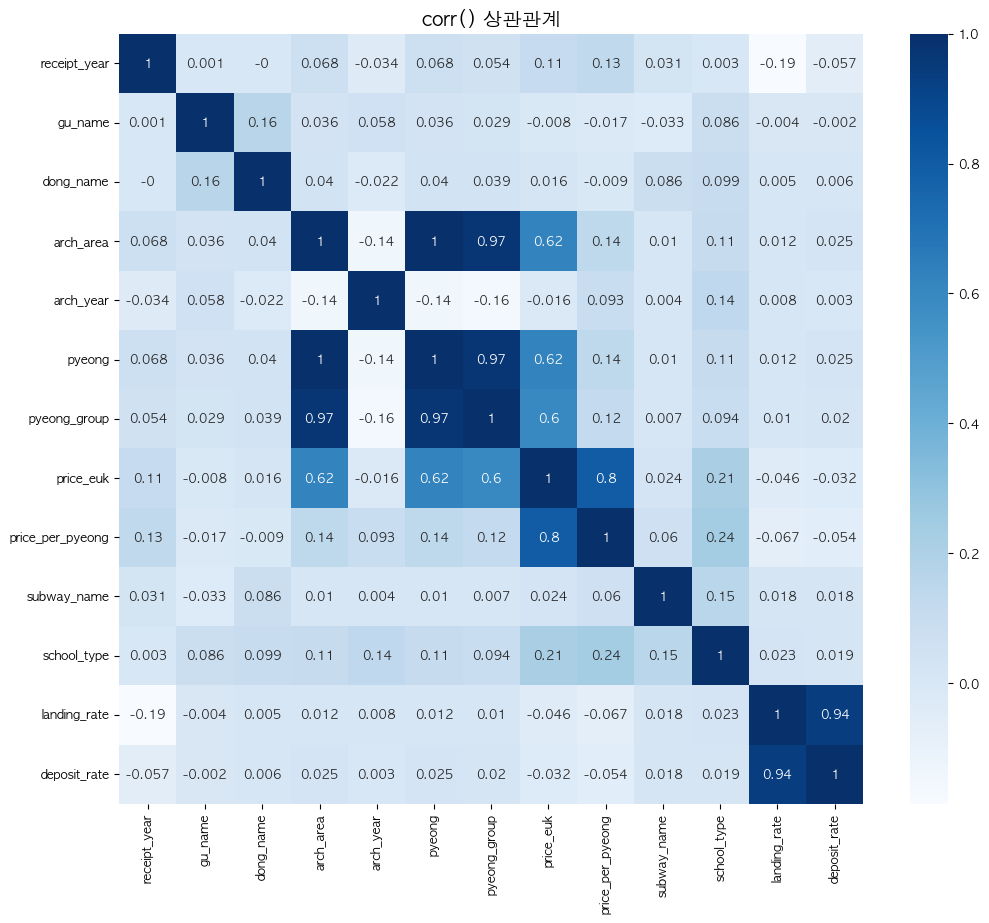

In [6]:
# 1. 폰트 설정 (애플고딕, macOS)
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 폰트
plt.rcParams['font.size'] = 9                 # 전체 폰트 크기
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지

plt.figure(figsize=(12,10))
sns.heatmap(apart_df.corr().round(3), cmap='Blues', annot=True)
plt.title("corr() 상관관계", fontsize = 14);

### 단순선형회귀

In [7]:
# 2022~2024년 데이터를 테스트셋으로, 나머지를 훈련셋으로 분리
train_df = apart_df[~apart_df['receipt_year'].isin([2022, 2023, 2024])]
test_df = apart_df[apart_df['receipt_year'].isin([2022, 2023, 2024])]

# X, y 분리
X_train = train_df.drop('price_euk', axis=1).select_dtypes(include=['number'])
y_train = train_df['price_euk']

X_test = test_df.drop('price_euk', axis=1).select_dtypes(include=['number'])
y_test = test_df['price_euk']

# 년도로 분리해서 사용할 땐 무작위로 섞는건 의미 없음

In [8]:
# X = apart_df[['arch_area', 'pyeong', 'pyeong_group']]
# y = apart_df[['price_euk']]

# 테스트 데이터와 훈련 데이터 나눠주는 함수
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # random_state는 전체 데이터를 섞어서 사용할 때 의미가 있음

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31441, 12), (102982, 12), (31441,), (102982,))

<Axes: xlabel='pyeong', ylabel='price_euk'>

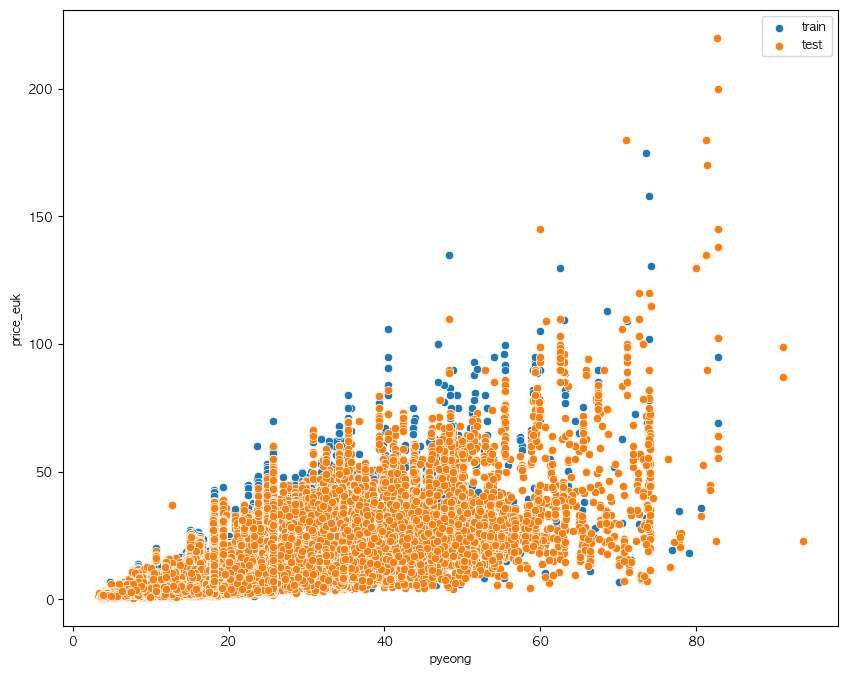

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train['pyeong'], y=y_train, label='train')
sns.scatterplot(x=X_test['pyeong'], y=y_test, label='test')

### 모델 생성 및 훈련

In [11]:
# 0. 모델 모듈 불러오기
from sklearn.linear_model import LinearRegression

# 1. 모델 생성
model = LinearRegression()

# 2. 훈련데이터로 모델 훈련
model.fit(X_train, y_train)

LinearRegression()

## 테스트세트로 평가
* **R2** 
    * 모델의 전반적인 성능(설명력)을 나타냄
        * 설명력 - 독립변수가 종속변수의 변동을 얼마나 잘 설명할 수 있는가
        * R2가 0.8이라면 모델이 80%를 설명할 수 있다. 20%는 모델에 포함되지 않은 요소들의 영향일 수 있다.
    * 0~1 사이로 정규화되어 있어 직관적으로 해석할 수 있음
    * 다른 모델 및 데이터셋과 비교하기 용이함      
* MSE
    * 오차를 제곱하기 때문에 해석하기 어려울 수 있음
    * 큰 오차 강조 : 큰 오차가 발생할 경우 MSE가 크게 증가. 큰 오차를 줄이는 데 집중할 수 있다.
    * 이상치에 민감하다.
* MAE
    * 원본 데이터와 같은 단위를 사용하여 해석이 용이하다.
* **RMSE**
    * MSE의 단점을 어느정도 보완하면서도 큰 오차에 대한 민감성을 유지
    * MSE의 제곱근. 원본 데이터와 같은 단위를 가져 직관적으로 이해하기 쉬움
    * 오차를 제곱하므로 이상치에 민감
    * MAE와의 차이가 클수록 오차에 대한 이상치가 존재함을 의미
    * MAE와 비슷하다면 이상치가 거의 없거나 오차가 고르개 분포함을 의미
* 평가와 관련된 함수들은 `metrics` 모듈에 포함되어 있음

In [12]:
apart_df.columns

Index(['receipt_year', 'gu_name', 'dong_name', 'arch_area', 'arch_year',
       'pyeong', 'pyeong_group', 'price_euk', 'price_per_pyeong',
       'subway_name', 'school_type', 'landing_rate', 'deposit_rate'],
      dtype='object')

In [13]:
# ------------------------------------------
# 평가 방법 선택 : MSE, MAE, RMSE, R2
# ------------------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
# ------------------------------------------
# 테스트 데이터의 예측값
#   pred
# ------------------------------------------
pred = model.predict(X_test)

# ------------------------------------------
# 모델 평가 
#   - 예측값과 실제값의 차이(Loss/Error) 이용
# ------------------------------------------
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'mse: {mse:.4f}')
print(f'mae: {mae:.4f}')
print(f'rmse: {rmse:.4f}')
print(f'r2: {r2:.4f}')

mse: 7.7745
mae: 1.5883
rmse: 2.7883
r2: 0.8951


### 다중 선형 회귀 (스케일링)

In [16]:
# ------------------------------------------
# 독립변수 스케일링
# ------------------------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #스케일 생성

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled[:,0].std()
X_train_scaled[:,0].mean()

np.float64(0.0)

<Axes: >

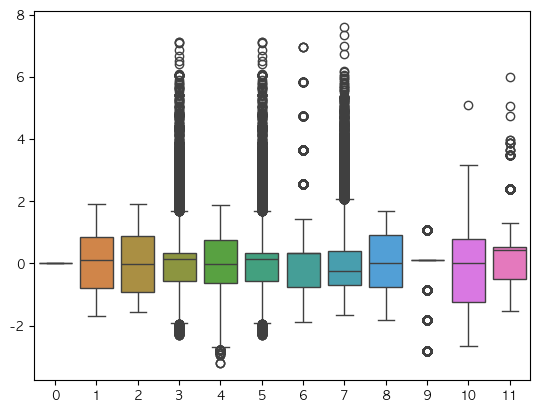

In [17]:
sns.boxplot(X_train_scaled)

In [18]:
# 0. 모델 모듈 불러오기
from sklearn.linear_model import LinearRegression

# 1. 모델 생성
model = LinearRegression()

# 2. 훈련데이터로 모델 훈련
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# ------------------------------------------
# 평가 방법 선택 : MSE, MAE, RMSE, R2
# ------------------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
# ------------------------------------------
# 테스트 데이터의 예측값
#   pred
# ------------------------------------------
pred = model.predict(X_test)

# ------------------------------------------
# 모델 평가 
#   - 예측값과 실제값의 차이(Loss/Error) 이용
# ------------------------------------------
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'mse: {mse:.4f}')
print(f'mae: {mae:.4f}')
print(f'rmse: {rmse:.4f}')
print(f'r2: {r2:.4f}')

mse: 7.7745
mae: 1.5883
rmse: 2.7883
r2: 0.8951


In [22]:
X_test.columns

Index(['receipt_year', 'gu_name', 'dong_name', 'arch_area', 'arch_year',
       'pyeong', 'pyeong_group', 'price_per_pyeong', 'subway_name',
       'school_type', 'landing_rate', 'deposit_rate'],
      dtype='object')

In [36]:
# ------------------------------------------
# 실제값과 모델의 예측값 비교
# ------------------------------------------
df_pred = pd.DataFrame({'X_test':X_test['deposit_rate'],
              'y_test':y_test,
              'y_pred':pred,})

df_pred['error'] = abs(df_pred['y_test']-df_pred['y_pred'])

df_pred.sort_values(by='error', ascending=False).head()

,X_test,y_test,y_pred,error
52587,3.41,220.0,100.554277,119.445723
65781,3.51,200.0,94.385860,105.614140
97292,3.65,180.0,88.349184,91.650816
49261,3.35,180.0,91.321297,88.678703
37791,3.37,170.0,85.370893,84.629107


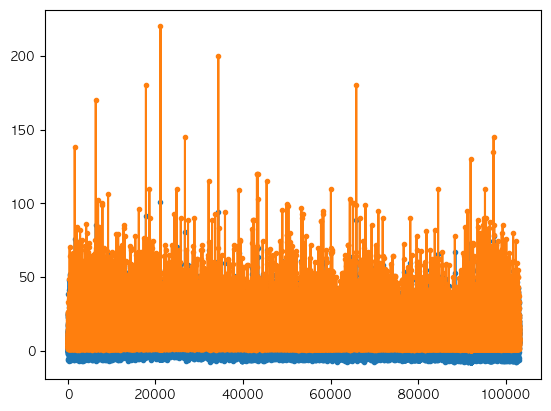

In [26]:
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='pred')
pass

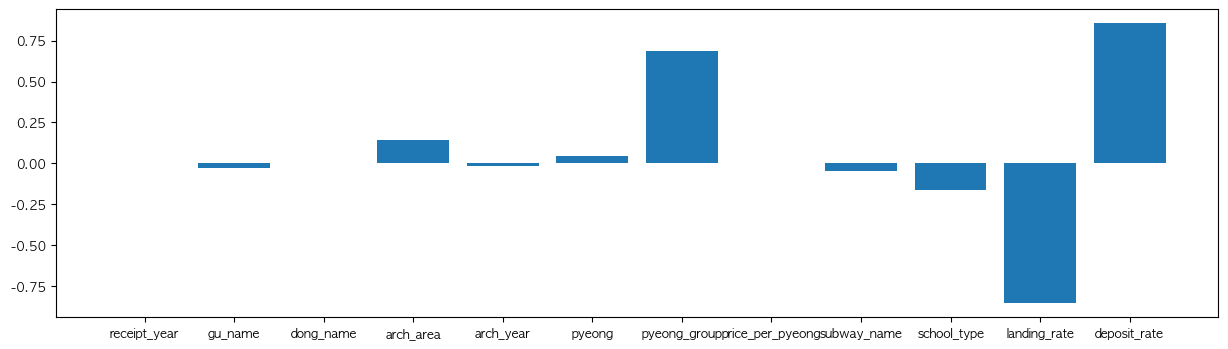

In [30]:
plt.figure(figsize=(15,4))
plt.bar(['receipt_year', 'gu_name', 'dong_name', 'arch_area', 'arch_year',
       'pyeong', 'pyeong_group', 'price_per_pyeong', 'subway_name',
       'school_type', 'landing_rate', 'deposit_rate'], model.coef_);